In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,f1_score

In [2]:
df = pd.read_csv("/kaggle/input/books-recommendation/books recommendation.csv")
df.head()
df.shape

(11127, 13)

In [3]:
df = df.drop(["Unnamed: 12"], axis= 1)
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,34889,Brown's Star Atlas: Showing All The Bright Sta...,Brown,Son & Ferguson,0,851742718,9.78E+12,eng,49,0,0,05-01-1977
1,22128,Patriots (The Coming Collapse),James Wesley,Rawles,3.63,156384155X,9.78E+12,eng,342,38,4,1/15/1999
2,16914,The Tolkien Fan's Medieval Reader,David E. Smith (Turgon of TheOneRing.net,one of the founding members of this Tolkien w...,3.58,1593600119,9.78E+12,eng,400,26,4,04-06-2004
3,12224,Streetcar Suburbs: The Process of Growth in Bo...,Sam Bass Warner,Jr./Sam B. Warner,3.58,674842111,9.78E+12,en-US,236,61,6,4/20/2004
4,2034,Comoediae 1: Acharenses/Equites/Nubes/Vespae/P...,Aristophanes/F.W. Hall/W.M. Geldart,5,198145047,9.78E+12,grc,364,0,0,2/22/1922,Oxford University Press USA


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   bookID              11127 non-null  int64 
 1   title               11127 non-null  object
 2   authors             11127 non-null  object
 3   average_rating      11127 non-null  object
 4   isbn                11127 non-null  object
 5   isbn13              11127 non-null  object
 6   language_code       11127 non-null  object
 7   num_pages           11127 non-null  object
 8   ratings_count       11127 non-null  int64 
 9   text_reviews_count  11127 non-null  int64 
 10  publication_date    11127 non-null  object
 11  publisher           11127 non-null  object
dtypes: int64(3), object(9)
memory usage: 1.0+ MB


,bookID,ratings_count,text_reviews_count
count,11127.000000,1.112700e+04,11127.000000
mean,21310.938887,1.793649e+04,541.864474
std,13093.358023,1.124794e+05,2576.174610
min,1.000000,0.000000e+00,0.000000
25%,10287.000000,1.040000e+02,9.000000
50%,20287.000000,7.450000e+02,47.000000
75%,32104.500000,4.993500e+03,237.500000
max,45641.000000,4.597666e+06,94265.000000


In [5]:
df.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [6]:
top_ten_ratings = df[df["ratings_count"]>1000000]
top_ten = top_ten_ratings.sort_values(by = "ratings_count").head(10)
top_ten_ratings = top_ten_ratings.sort_values(by = "ratings_count", ascending=False).head(10)
top_ten_ratings

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
9953,41865,Twilight (Twilight #1),Stephenie Meyer,3.59,316015849,9.78E+12,eng,501,4597666,94265,09-06-2006,Little Brown and Company
1219,5907,The Hobbit or There and Back Again,J.R.R. Tolkien,4.27,618260307,9.78E+12,eng,366,2530894,32871,8/15/2002,Houghton Mifflin
7959,5107,The Catcher in the Rye,J.D. Salinger,3.8,316769177,9.78E+12,eng,277,2457092,43499,1/30/2001,Back Bay Books
6616,960,Angels & Demons (Robert Langdon #1),Dan Brown,3.89,1416524797,9.78E+12,eng,736,2418736,21303,04-01-2006,Pocket Books
123,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9.78E+12,eng,435,2339585,36325,05-01-2004,Scholastic Inc.
432,15881,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling/Mary GrandPré,4.42,439064864,9.78E+12,eng,341,2293963,34692,06-02-1999,Arthur A. Levine Books / Scholastic Inc.
234,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9.78E+12,eng,870,2153167,29221,09-01-2004,Scholastic Inc.
633,34,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. Tolkien,4.36,618346252,9.78E+12,eng,398,2128944,13670,09-05-2003,Houghton Mifflin Harcourt
5996,7613,Animal Farm,George Orwell/Boris Grabnar/Peter Škerl,3.93,452284244,9.78E+12,eng,122,2111750,29677,05-06-2003,NAL
110,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9.78E+12,eng,652,2095690,27591,9/16/2006,Scholastic Inc.


In [7]:
top_ten['average_rating'] = pd.to_numeric(top_ten['average_rating'], errors='coerce')
top_ten = top_ten.dropna(subset=['average_rating'])

<Axes: xlabel='average_rating', ylabel='title'>

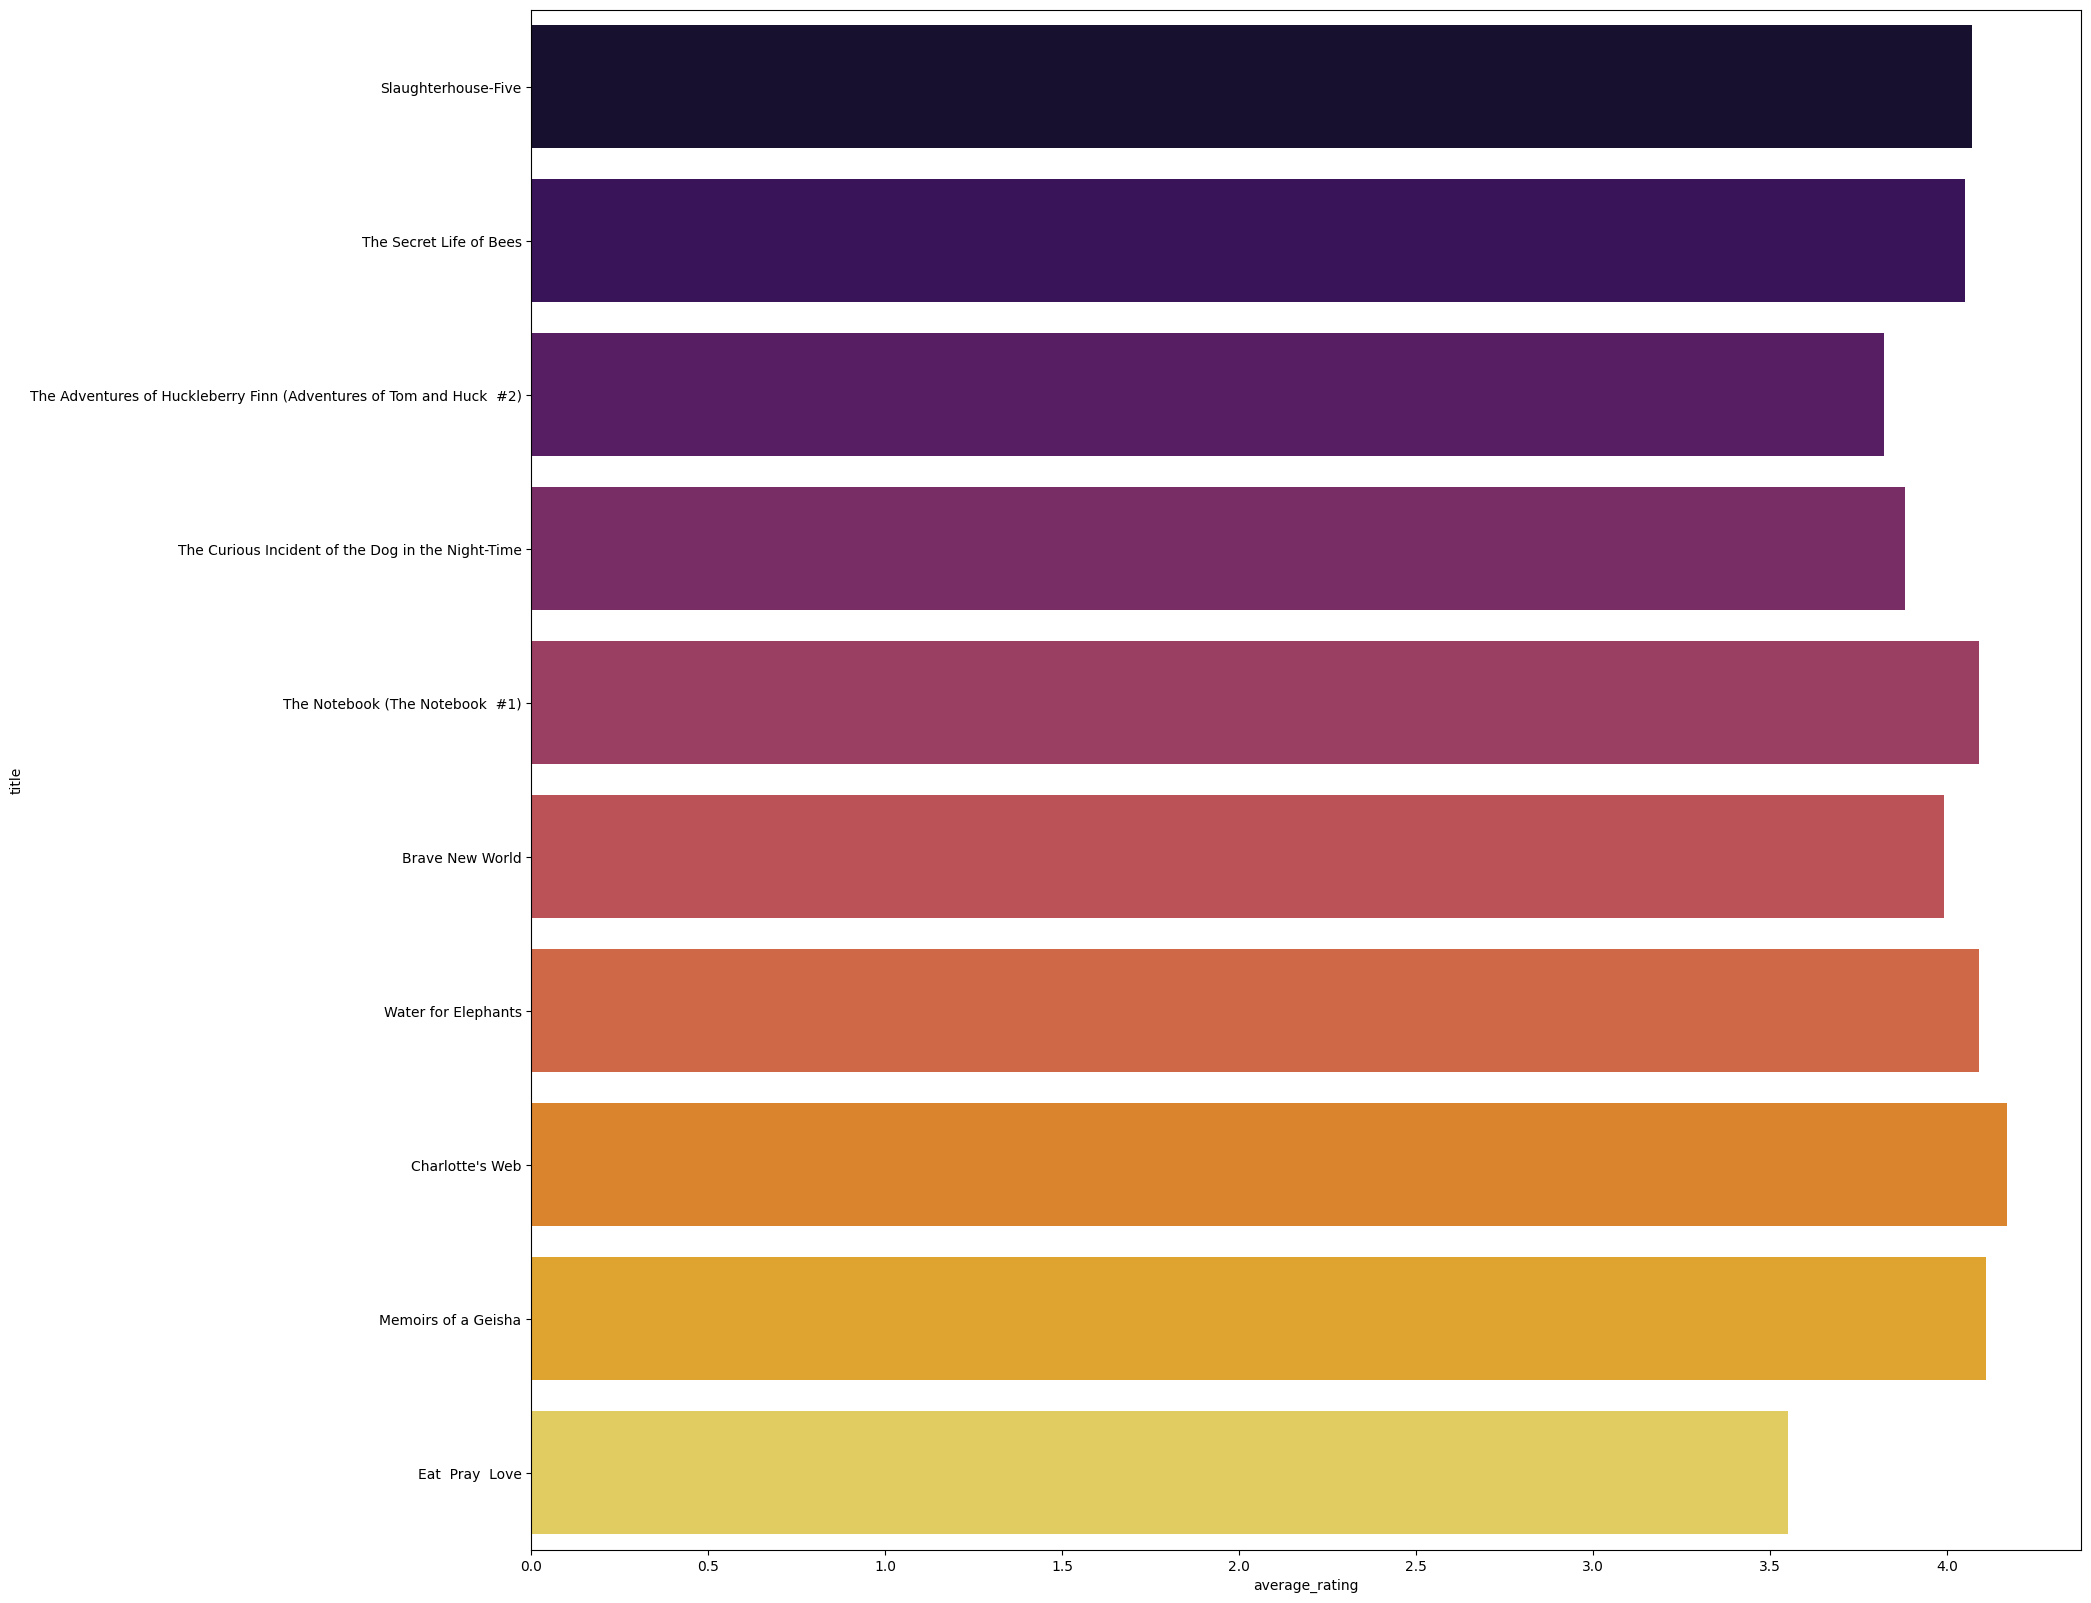

In [8]:
plt.figure(figsize=(20,20))
sns.barplot(x= "average_rating", y="title", data=top_ten, palette='inferno')

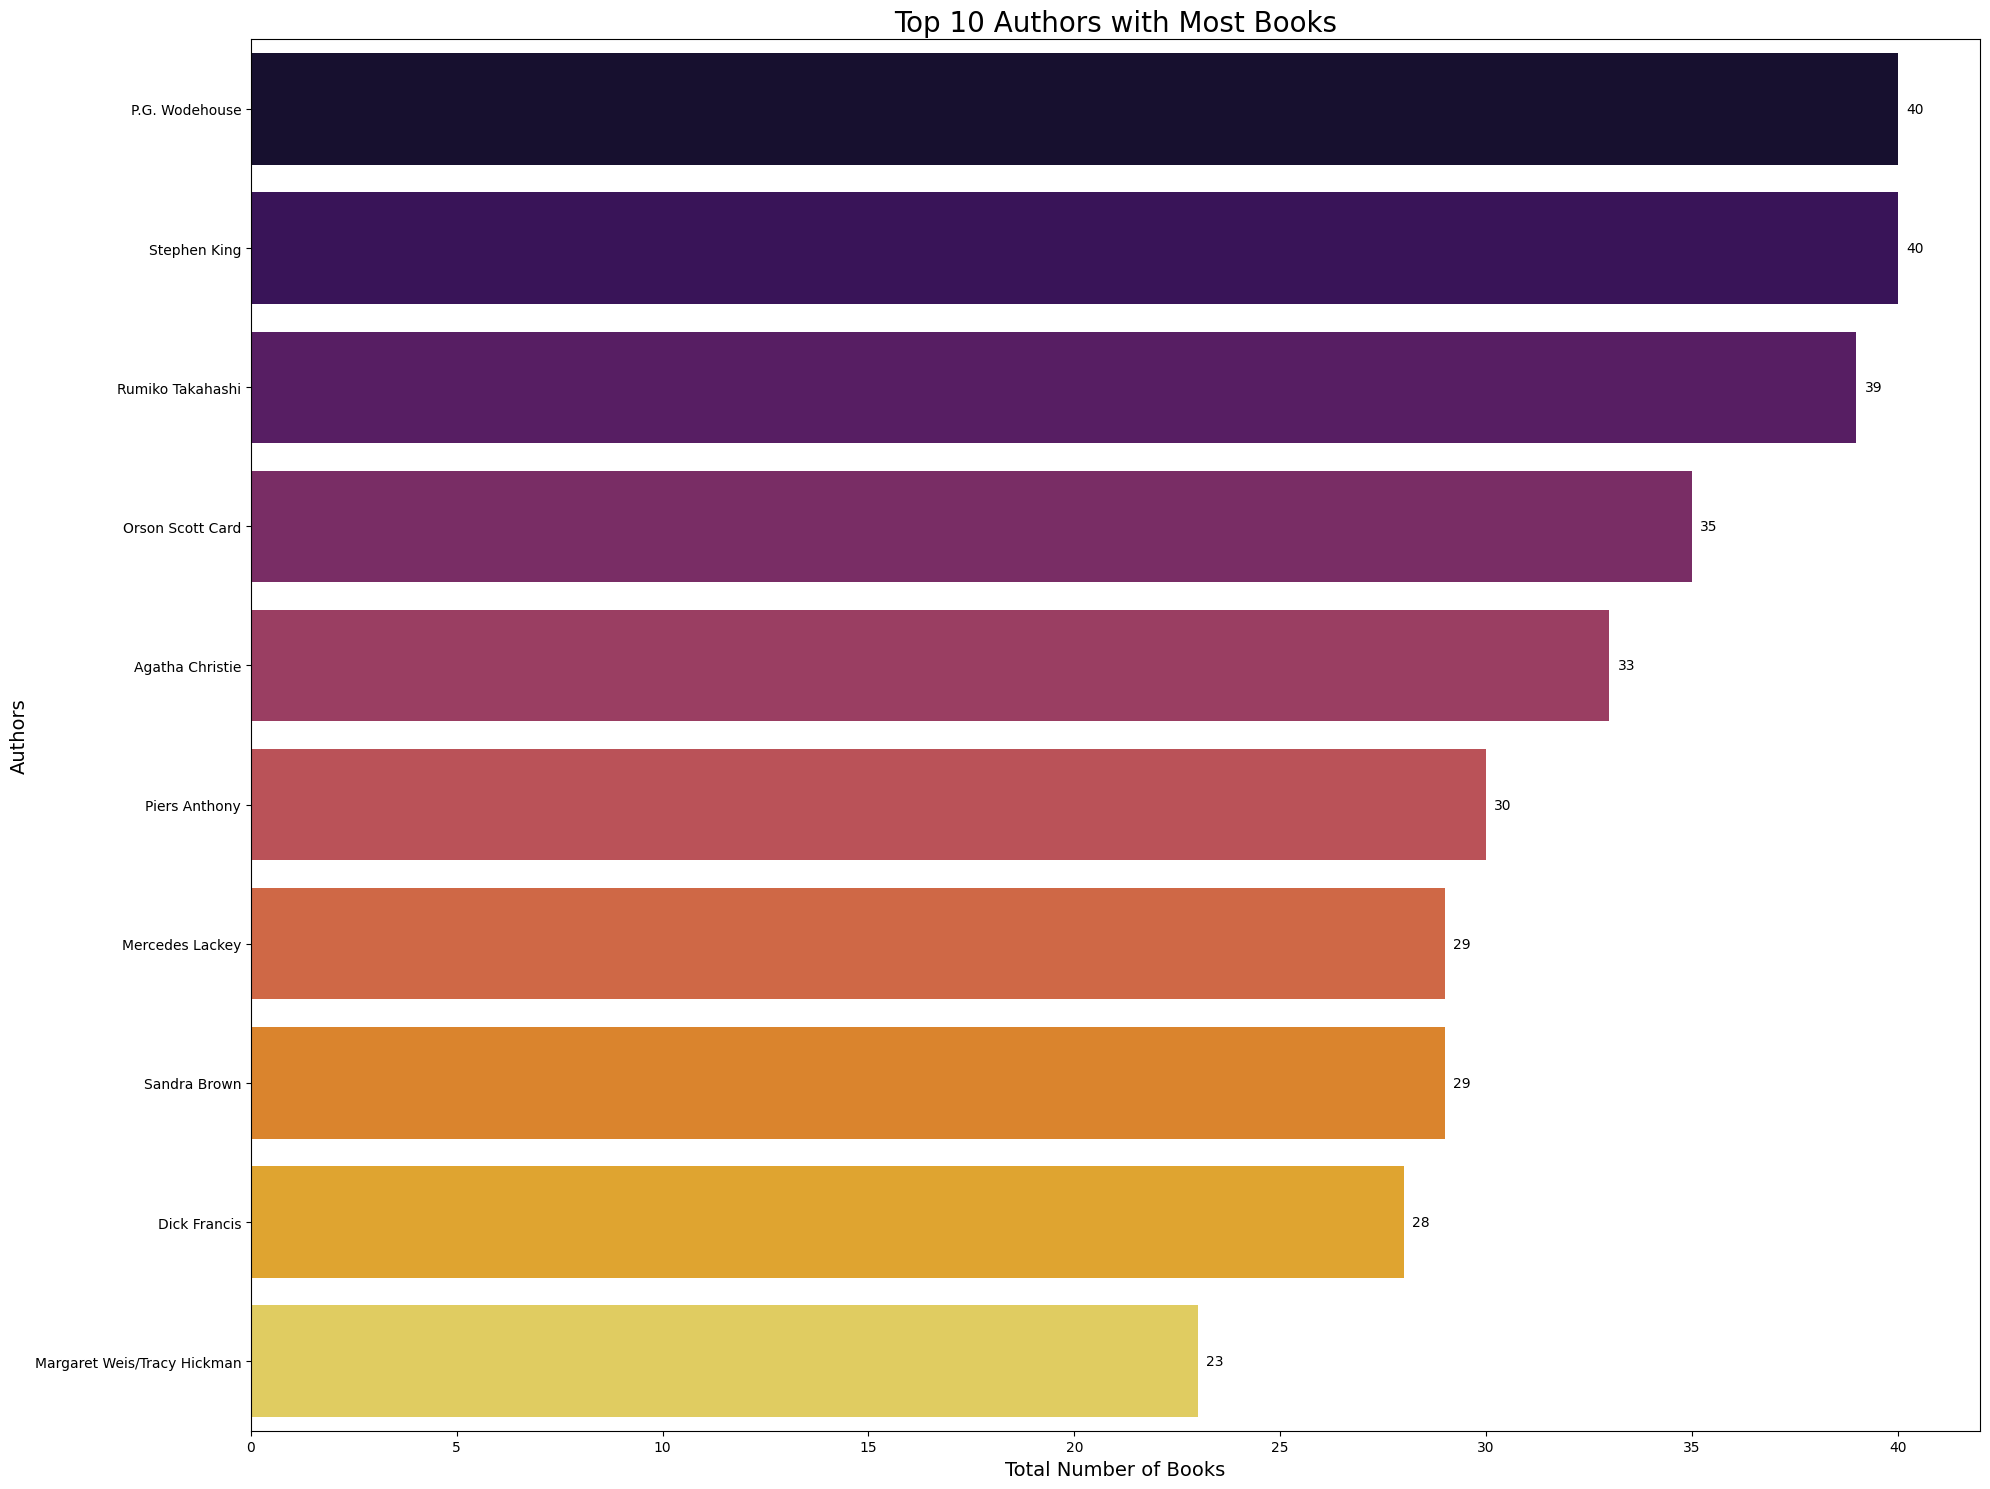

In [9]:
# Grouping and preparing the data
book_aut = df.groupby('authors')['title'].count().reset_index().sort_values('title', ascending=False).head(10)
book_aut = book_aut.rename(columns={'title': 'book_count'})  # Rename for clarity

# Plotting
plt.figure(figsize=(20, 15))
ax = sns.barplot(x='book_count', y='authors', data=book_aut, palette='inferno')
ax.set_title("Top 10 Authors with Most Books", fontsize=20)
ax.set_xlabel("Total Number of Books", fontsize=14)
ax.set_ylabel("Authors", fontsize=14)

# Add text labels on bars
for i in ax.patches:
    ax.text(i.get_width() + 0.2, i.get_y() + i.get_height() / 2, str(int(i.get_width())), va='center')

plt.tight_layout()
plt.show()


/tmp/ipykernel_13/677427308.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['average_rating'], ax=ax)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


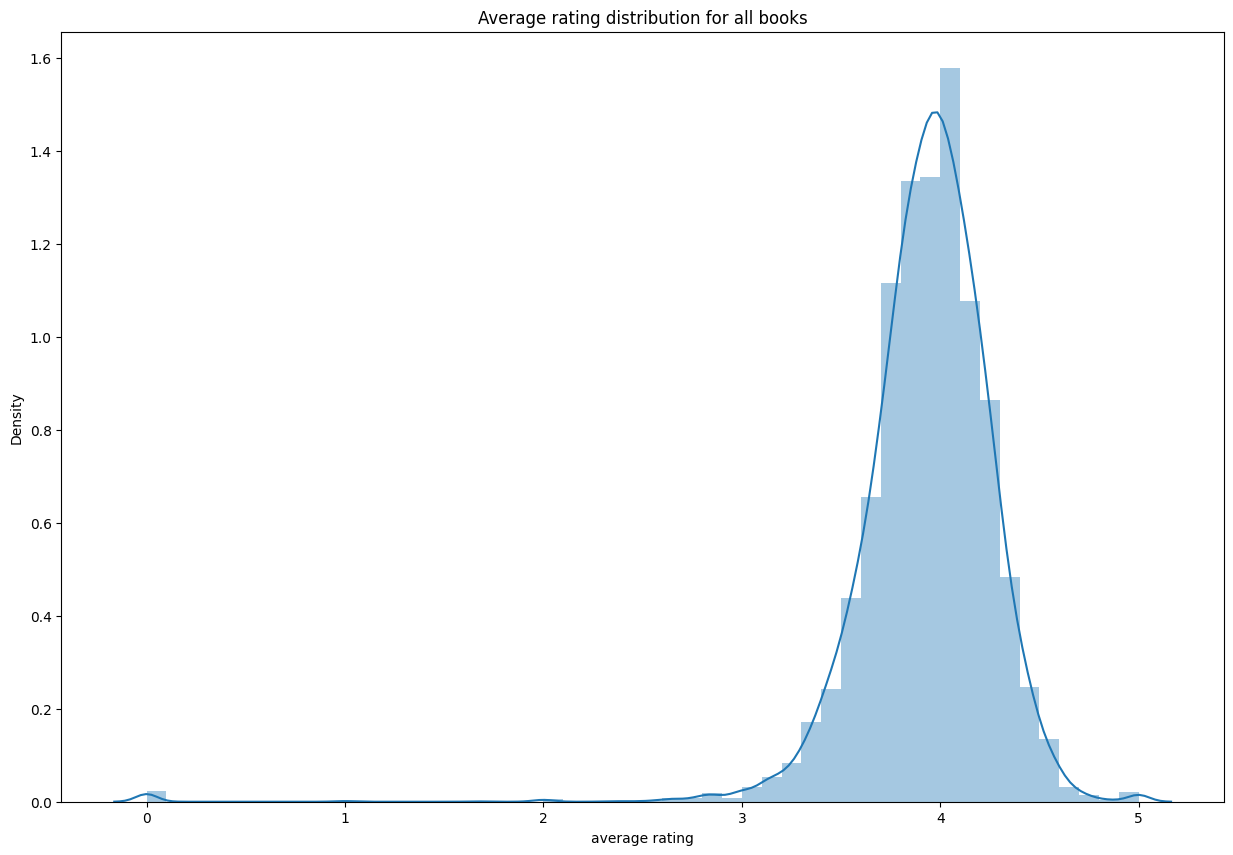

<Figure size 2000x2000 with 0 Axes>

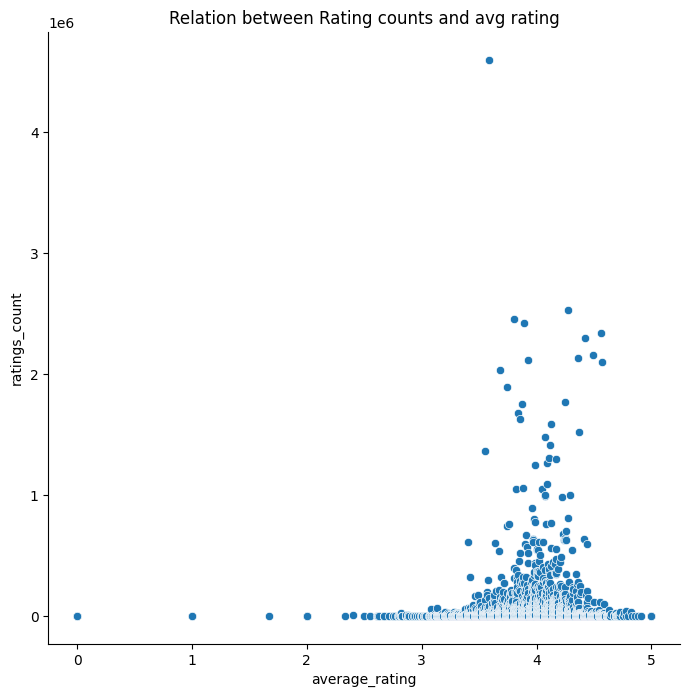

In [10]:
df=df.sort_values('average_rating')
df=df.iloc[4:]
df.average_rating=df.average_rating.astype(float)
fig, ax= plt.subplots(figsize=[15,10])

sns.distplot(df['average_rating'], ax=ax)
ax.set_title('Average rating distribution for all books')
ax.set_xlabel('average rating')
plt.figure(figsize=(20,20))
ax=sns.relplot(data=df, x="average_rating", y="ratings_count",sizes=(400,200), height=7)
plt.title('Relation between Rating counts and avg rating')
ax.set_axis_labels("average_rating", "ratings_count")

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x2000 with 0 Axes>

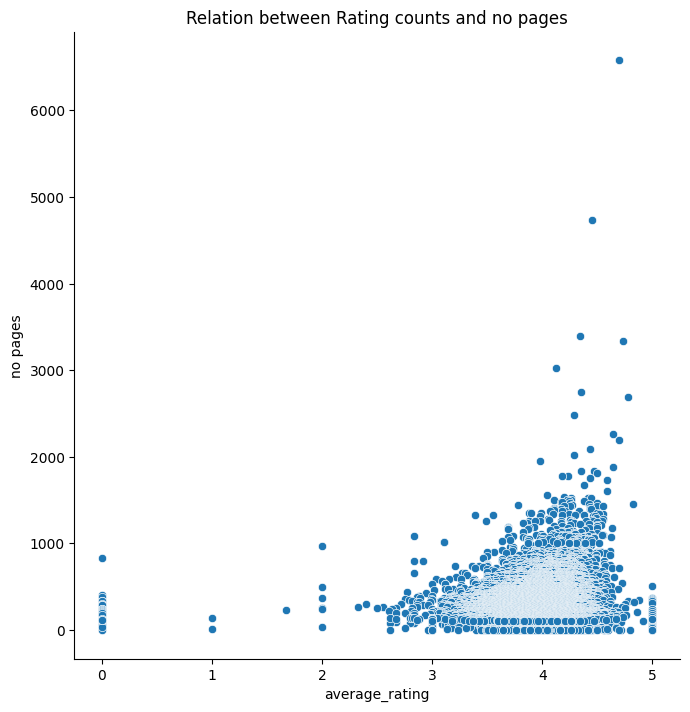

In [11]:
df=df.sort_values('num_pages', ascending=False)
df=df.iloc[4:]
df.head(20)
df.num_pages=df.num_pages.astype(float)
plt.figure(figsize=(20,20))
ax=sns.relplot( x="average_rating", y="num_pages",data=df,sizes=(400,200), height=7)
plt.title('Relation between Rating counts and no pages')
ax.set_axis_labels("average_rating", "no pages")

In [12]:
df2 = df.copy()

df2.loc[(df2["average_rating"]>=0) & (df2["average_rating"]<=1), "rating between"]="between 0 and 1"

df2.loc[(df2["average_rating"]>1) & (df2["average_rating"]<=2), "rating between"]="between 1 and 2"

df2.loc[(df2["average_rating"]>2) & (df2["average_rating"]<=3), "rating between"]="between 2 and 3"

df2.loc[(df2["average_rating"]>3) & (df2["average_rating"]<=4), "rating between"]="between 3 and 4"

df2.loc[(df2["average_rating"]>4) & (df2["average_rating"]<=5), "rating between"]="between 4 and 5"

df2.sort_values("average_rating")

df_rating = pd.get_dummies(df2["rating between"])
df_language = pd.get_dummies(df2["language_code"])
feature_df = pd.concat([df_rating, df_language, df2["average_rating"], df2["ratings_count"]], axis=1)

In [13]:
minmax = MinMaxScaler()

feature_df = minmax.fit_transform(feature_df)

from sklearn import neighbors

model = neighbors.NearestNeighbors(n_neighbors= 8, algorithm= "ball_tree")
model.fit(feature_df)

dist, book_id = model.kneighbors(feature_df)

def recommend_book(name):
    matches = df2[df2["title"].str.lower() == name.lower()]
    
    if matches.empty:
        return f"Book '{name}' not found in the dataset."

    book_index = matches.index[0]
    recommended_titles = []
    
    for idx in book_id[book_index]:
        recommended_titles.append(df2.loc[idx].title)

    return recommended_titles


In [14]:
result = recommend_book("warrior of the light")
print(result)

['Mandy', 'Stranger in the Forest: On Foot Across Borneo', 'The Complete Book of Home  Site and Office Security: Selecting  Installing and Troubleshooting Systems and Devices', 'The Guy Not Taken: Stories', 'The Alexandria Quartet  (The Alexandria Quartet #1-4)', 'Hard Candy', 'Warrior of the Light', 'Dangling Man']


In [15]:
# fuzzy matching (i.e., similar titles)
# Fuzzy matching helps recommend books even when the user misspells or only partially types the title.
# We'll use Python's built-in difflib module for simplicity (no extra installation needed).

import difflib

def recommend_book(name, top_n_matches=1):
    # Get closest matching title(s)
    possible_matches = difflib.get_close_matches(name, df2['title'], n=top_n_matches, cutoff=0.6)

    if not possible_matches:
        return f"No close match found for '{name}'."

    # Use the best match (you could let user pick from multiple if needed)
    best_match = possible_matches[0]
    book_index = df2[df2["title"] == best_match].index[0]

    recommended_titles = []
    for idx in book_id[book_index]:
        recommended_titles.append(df2.loc[idx].title)

    return {
        "Input Title": name,
        "Best Match Found": best_match,
        "Recommended Books": recommended_titles
    }

In [16]:
result = recommend_book("warrior of the light")
print(result)

{'Input Title': 'warrior of the light', 'Best Match Found': 'Warrior of the Light', 'Recommended Books': ['Mandy', 'Stranger in the Forest: On Foot Across Borneo', 'The Complete Book of Home  Site and Office Security: Selecting  Installing and Troubleshooting Systems and Devices', 'The Guy Not Taken: Stories', 'The Alexandria Quartet  (The Alexandria Quartet #1-4)', 'Hard Candy', 'Warrior of the Light', 'Dangling Man']}
